### Import Statements

In [1]:
!pip install -q transformers datasets==4.0.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pathos 0.3.4 requires dill>=0.4.0, but you have dill 0.3.8 which is incompatible.
pathos 0.3.4 requires multiprocess>=0.70.18, but you have multiprocess 0.70.16 which is incompatible.


In [14]:
# sudo apt-get update
!sudo apt-get install tesseract-ocr -y 

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fontconfig fontconfig-config fonts-dejavu-core libarchive13 libcairo2
  libdatrie1 libdeflate0 libfontconfig1 libfreetype6 libfribidi0 libgif7
  libglib2.0-0 libglib2.0-data libgraphite2-3 libharfbuzz0b libjbig0
  libjpeg-turbo8 libjpeg8 liblept5 libopenjp2-7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpixman-1-0 libpng16-16
  libtesseract4 libthai-data libthai0 libtiff5 libwebp7 libwebpmux3 libx11-6
  libx11-data libxau6 libxcb-render0 libxcb-shm0 libxcb1 libxdmcp6 libxext6
  libxrender1 shared-mime-info tesseract-ocr-eng tesseract-ocr-osd ucf
  xdg-user-dirs
Suggested packages:
  lrzip
The following NEW packages will be installed:
  fontconfig fontconfig-config fonts-dejavu-core libarchive13 libcairo2
  libdatrie1 libdeflate0 libfontconfig1 libfreetype6 libfribidi0 libgif7
  libglib2.0-0 libglib2.0-data libgraphite2-3 li

In [3]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git' --q

  DEPRECATION: Building 'detectron2' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'detectron2'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'fvcore' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'fvcore'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [4]:
!pip install -U datasets huggingface_hub fsspec -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.3.1 requires nvidia-ml-py3<8.0,>=7.352.0, which is not installed.
jupyter-ai 2.31.5 requires faiss-cpu!=1.8.0.post0,<2.0.0,>=1.8.0, which is not installed.
autogluon-multimodal 1.3.1 requires nltk<3.9,>=3.4.5, but you have nltk 3.9.1 which is incompatible.
autogluon-multimodal 1.3.1 requires transformers[sentencepiece]<4.50,>=4.38.0, but you have transformers 4.53.1 which is incompatible.
autogluon-timeseries 1.3.1 requires transformers[sentencepiece]<4.50,>=4.38.0, but you have transformers 4.53.1 which is incompatible.
s3fs 2024.12.0 requires fsspec==2024.12.0.*, but you have fsspec 2025.3.0 which is incompatible.


In [1]:
!du -sh /home/sagemaker-user/.cache
!rm -rf /home/sagemaker-user/.cache/*
!du -sh /home/sagemaker-user/.cache

15G	/home/sagemaker-user/.cache


0	/home/sagemaker-user/.cache


In [6]:
import helpers
import importlib
importlib.reload(helpers)
import helpers

In [7]:
from transformers import pipeline
import pprint
import time
import pandas as pd

2025-08-10 07:58:53.879326: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
import warnings
warnings.filterwarnings('ignore')

from transformers.utils import logging
logging.set_verbosity_error() 

### Load Datasets

In [9]:
from datasets import load_dataset
vqa = load_dataset("Multimodal-Fatima/VQAv2_sample_train", split='train[:10]')

README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001-daacd1ed85a01f(…):   0%|          | 0.00/155M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [10]:
from datasets import load_dataset

ds = load_dataset("openbmb/VisRAG-Ret-Test-PlotQA", "corpus", split="train[:10]")

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/289M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9593 [00:00<?, ? examples/s]

#### Load Image Using URL

### CV Tasks Comparison
* What's the difference between D
* iterate through all computer vision tasks default model
    * [vision model]
        * image classification: does not require additional parameters
        * [x] zero-shot image classification: require parameter 'candidate_labels'
    [multimodal]
    * visual question answering: require parameter 'question'
        * ViLT, 
    * document question answering: require parameter 'question'
        * model type: Donut, LayoutLM
        * output parameters: 'answer'
    * image captioning / image to text
        * GIT
    * image segmentation
        * "facebook/mask2former-swin-base-coco-panoptic"
        * output parameters: 'label', 'mask'
    * retrieval
    * text generation
    * optional: document QA (layout models)
* compare output of each task
    * in general, they are not good at data analysis tasks from dataset "VisRAG-Ret-Test-PlotQA"
    * good at "VQAv2_sample_train" datax
* compare the architecture of each corresponding model
    * https://github.com/NielsRogge/Transformers-Tutorials/blob/0a4dd70ff9606009c1f2b0eaa4e0df678df4c967/README.md


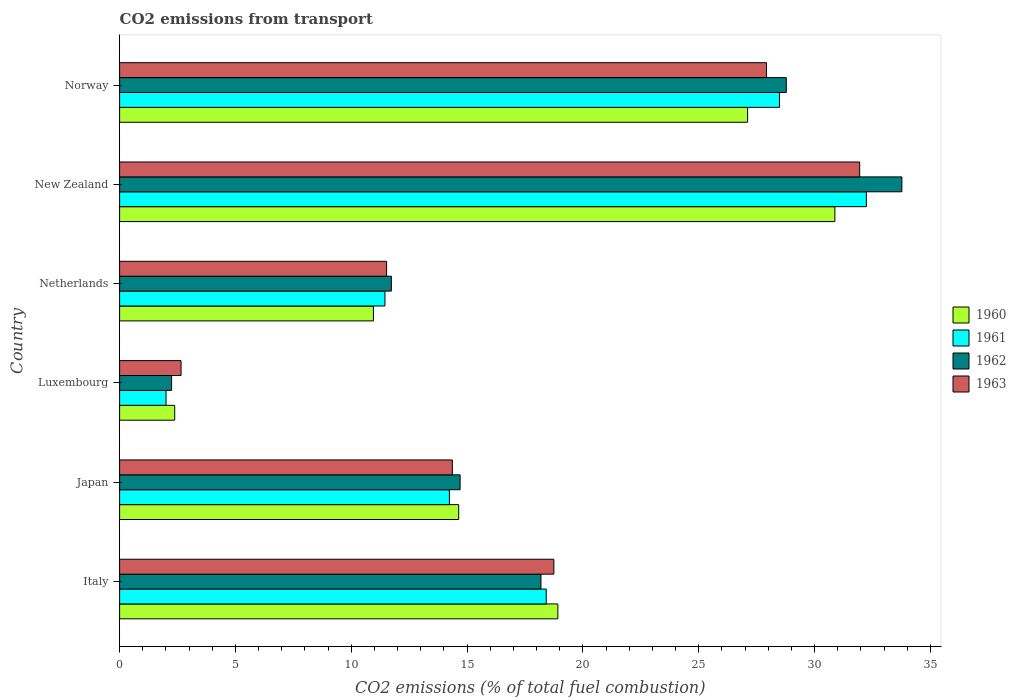

In [11]:
image = ds['image'][8]
# image_0 = vqa[2]['image']
image

In [33]:
generation_params = {
    "max_new_tokens": 256,
    "min_new_tokens": 120,
}

user_query = 'what does the image show?'

task_list = [
    { 
        'task': 'document-question-answering',
        'model': "naver-clova-ix/donut-base-finetuned-docvqa",
        'model type': 'Donut',
        'params': {
            'question': user_query,
        }
    },
    {
        'task': 'document-question-answering',
        'model': "tiennvcs/layoutlmv2-base-uncased-finetuned-docvqa",
        'model type': 'LayoutLM',
        'params': {
            'question': user_query,
        }   
    },
    { 
        'task': 'document-question-answering',
        # 'model': "impira/layoutlm-document-qa", # default model
        'model type': 'LayoutLM',
        'params': {
            'question': user_query,
        }
    },
    {
        'task': 'visual-question-answering',
        'model':  'Salesforce/blip-vqa-capfilt-large',
        'model type': 'BLIP',
        'params': {
            'question': user_query,
        }
    },
    {
        'task': 'visual-question-answering',
        # 'model':  '',
        'model type': '',
        'params': {
            'question': user_query,
        }
    },
    {
        'task': 'image-classification',
        # 'model':  'Salesforce/blip-vqa-capfilt-large',
        'model type': '',
        'params': {}
    },
    {
        'task': 'image-to-text',
        'model type': '',
        'params': {}
    },
    {
        'task': 'image-segmentation',
        'model': "facebook/mask2former-swin-base-coco-panoptic",
        'model type': 'SWIN',
        'params': {}
    },
]


results = []

for i in task_list:
    task = i['task']
    params = i['params']
    model_type = i['model type']
    row = {
        'task': task,
        'params': params,
        'model type': model_type
        }
    print(f'\n## Task: {task}')

    try:
        model = i['model']
        row['model'] = model
        pipe = pipeline(task, model=model)
        print(f'Model provided: {model}')
        
    except Exception as e:
        print(e)
        print('No model provided')
        pipe = pipeline(task, )
        row['model'] = pipe.model.name_or_path

    start_time = time.time()
    output = pipe(
        image, 
        # max_new_tokens=10000, min_new_tokens=200, do_sample=True, 
        **params
    )

    execution_time = time.time() - start_time

    row['time'] = execution_time
    row['output'] = output
    
    # pprint.pprint(pipe.model)
    pprint.pprint(output)
    
    results.append(row)
    results_df = pd.DataFrame(results)
    


## Task: document-question-answering


Model provided: naver-clova-ix/donut-base-finetuned-docvqa
[{'answer': 'co2'}]

## Task: document-question-answering
Model provided: tiennvcs/layoutlmv2-base-uncased-finetuned-docvqa
[{'answer': '—', 'end': 17, 'score': 0.3009874224662781, 'start': 17}]

## Task: document-question-answering
'model'
No model provided
[{'answer': 'CO2 emissions (% of total fuel combustion)',
  'end': 16,
  'score': 0.1094897910952568,
  'start': 10}]

## Task: visual-question-answering
Model provided: Salesforce/blip-vqa-capfilt-large
[{'answer': 'chart of countries'}]

## Task: visual-question-answering
'model'
No model provided
[{'answer': 'nothing', 'score': 0.016844723373651505},
 {'answer': 'words', 'score': 0.015476851724088192},
 {'answer': 'phone', 'score': 0.0132528617978096},
 {'answer': 'directions', 'score': 0.012917141430079937},
 {'answer': 'train', 'score': 0.012560748495161533}]

## Task: image-classification
'model'
No model provided


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

[{'label': 'web site, website, internet site, site',
  'score': 0.7287737131118774},
 {'label': 'binder, ring-binder', 'score': 0.02215629070997238},
 {'label': 'screen, CRT screen', 'score': 0.01686996966600418},
 {'label': 'envelope', 'score': 0.013570886105298996},
 {'label': 'desktop computer', 'score': 0.011755614541471004}]

## Task: image-to-text
'model'
No model provided


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/211 [00:00<?, ?B/s]

[{'generated_text': 'a picture of a blue and white photo of a computer '}]

## Task: image-segmentation


config.json: 0.00B [00:00, ?B/s]

In [ ]:

helpers.display_comparison_results(results_df)


,task,params,model type,model,time,output
0,document-question-answering,{'question': 'what does the image show?'},Donut,naver-clova-ix/donut-base-finetuned-docvqa,16.433214,[{'answer': 'co2'}]
1,document-question-answering,{'question': 'what does the image show?'},LayoutLM,tiennvcs/layoutlmv2-base-uncased-finetuned-docvqa,0.631402,"[{'score': 0.3009874224662781, 'answer': '—', 'start': 17, 'end': 17}]"
2,document-question-answering,{'question': 'what does the image show?'},LayoutLM,impira/layoutlm-document-qa,0.433732,"[{'score': 0.1094897910952568, 'answer': 'CO2 emissions (% of total fuel combustion)', 'start': 10, 'end': 16}]"
3,visual-question-answering,{'question': 'what does the image show?'},BLIP,Salesforce/blip-vqa-capfilt-large,0.928211,[{'answer': 'chart of countries'}]
4,visual-question-answering,{'question': 'what does the image show?'},BLIP,dandelin/vilt-b32-finetuned-vqa,0.273232,"[{'score': 0.016844715923070908, 'answer': 'nothing'}, {'score': 0.015476836822926998, 'answer': 'words'}, {'score': 0.013252826407551765, 'answer': 'phone'}, {'score': 0.012917086482048035, 'answer': 'directions'}, {'score': 0.012560713104903698, 'answer': 'train'}]"


In [ ]:
def display_segmentation(output):
    output_labels = [i['label'] for i in output]
    output_masks = [i['mask'] for i in output]
    print(output_labels)
    for m in output_masks:
        display(m)
        
    return output_labels

### Model Comparison


In [14]:
from typing import List, Dict
import pandas as pd
from IPython.display import display, HTML
import time
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
import requests
import PIL
from PIL import Image

def compare_model_outputs(
    models: Dict,
    test_questions: List[str],
    image: PIL.PngImagePlugin.PngImageFile,
    processors=None,
    pipeline_mode=False,
) -> pd.DataFrame:
    """
    Compare outputs from different models for multiple test questions
    
    Args:
        models (Dict): Dictionary of model names and their corresponding model objects
        test_questions (List[str]): List of test questions to evaluate
        image_path (str): Path to the image file
        processor: The processor to use for encoding/decoding
        
    Returns:
        pd.DataFrame: DataFrame containing results comparison
    """
    
    results = []
    
    # Load image once
    if not isinstance(image, PIL.PngImagePlugin.PngImageFile):
        image = Image.open(image)

    display(image)
    
    for question in test_questions:
        row = {'Question': question}

        # Get predictions from each model
        for idx, (model_name, model) in enumerate(models.items()):

            if pipeline_mode:
                print('Pipeline Model')
                start_time = time.time()
            
                try:
                    prediction = model(image=image, question=question)
                    print(f"""Output: \n {prediction}""")
                    execution_time = time.time() - start_time
                    
                    row[f'{model_name}_output'] = prediction
                    row[f'{model_name}_time'] = f"{execution_time:.2f}s"
                    
                except Exception as e:
                    row[f'{model_name}_output'] = f"Error: {str(e)}"
                    row[f'{model_name}_time'] = "N/A"
            
            else:
                # Initiate processor and model
                if not processors:
                    processor = Pix2StructProcessor.from_pretrained(model_name)
                processor = processors[idx]

                inputs = processor(image, question, return_tensors="pt")
                start_time = time.time()
                
                try:
                    outputs = model.generate(**inputs) 
                    prediction = processor.decode(outputs[0], skip_special_tokens=True)
                    execution_time = time.time() - start_time
                    
                    row[f'{model_name}_output'] = prediction
                    row[f'{model_name}_time'] = f"{execution_time:.2f}s"
                    
                except Exception as e:
                    row[f'{model_name}_output'] = f"Error: {str(e)}"
                    row[f'{model_name}_time'] = "N/A"
        
        results.append(row)
    
    # Create DataFrame
    df = pd.DataFrame(results)
    
    return df



In [20]:
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
from transformers import DonutProcessor, VisionEncoderDecoderModel

processor_deplot = Pix2StructProcessor.from_pretrained('google/deplot')
model_deplot = Pix2StructForConditionalGeneration.from_pretrained('google/deplot')


processor_donut = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")
model_donut = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")

# Load image classification model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor_nsfw = AutoImageProcessor.from_pretrained("Falconsai/nsfw_image_detection")
model_nsfw = AutoModelForImageClassification.from_pretrained("Falconsai/nsfw_image_detection")

# processor_donut = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-rvlcdip")
# model_donut = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-rvlcdip")

preprocessor_config.json:   0%|          | 0.00/359 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/478 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/803M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/803M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

In [24]:
# Example test setup
models = {
    # 'naver-clova-ix/donut-base-finetuned-rvlcdip': pipe_donut,
    # 'google/deplot': pipe_deplot,
    # 'Salesforce/blip-vqa-capfilt-large': pipe_blip,
    # 'dandelin/vilt-b32-finetuned-vqa': pipe_vlit,
    'google/deplot': model_deplot,
    'donut': model_donut,
    # 'nsfw': model_nsfw
    
}

processors = [
    processor_deplot,
    processor_donut,
    # processor_nsfw
#     processor_blip,
#     processor_vlit
]

test_questions = [
    "Generate key insights based on the figure below:",
]


image_0 = ds['image'][0]

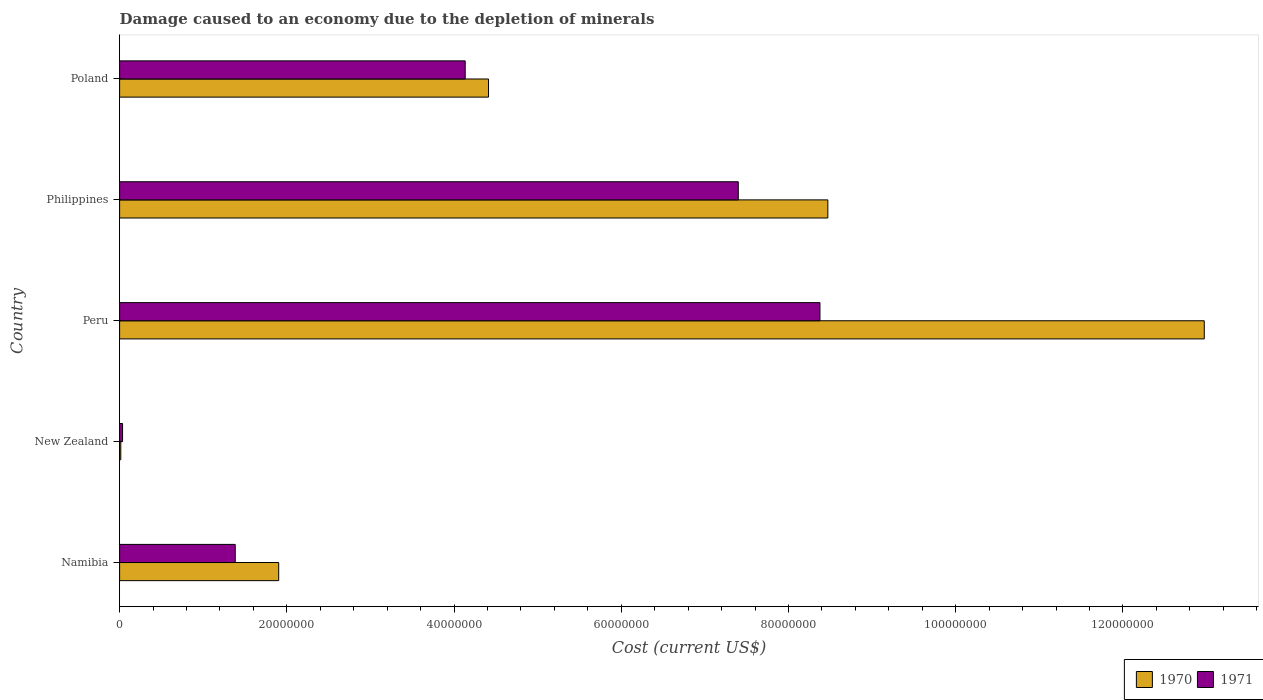

Output: 
 tensor([[    0, 36757,   789, 19657,  2094,   281,   329,  2076,   908,   281,
           276, 36996,   280, 14124,    27, 37446,   789,   273,   277,   292,
           295]])
Output: 
 tensor([[54450, 25209, 26756, 25515, 46192, 26361, 46192, 37910, 56738, 48941,
         34360, 37746,  2586,  2674, 40795, 18619, 40831, 57523,     2]])


,Question,google/deplot_output,google/deplot_time,donut_output,donut_time
0,Generate key insights based on the figure below:,TITLE | Damage caused to an economy due to the depletion of minerals<0x0A>Country | 197,9.34s,Generate key insights based on the figure below: cost current us$,16.37s


In [25]:
# Run comparison
results_df = compare_model_outputs(
    models=models,
    test_questions=test_questions,
    image=image_0,
    processors=processors,
    # pipeline_mode=True
)

# Display results
display_comparison_results(results_df)

In [30]:
pd.set_option("display.max_colwidth", 100)
results_df['donut_output']

0    Generate key insights based on the figure below: cost current us$
Name: donut_output, dtype: object

In [24]:
from IPython.display import HTML, Markdown
output = processor.decode(predictions[0], skip_special_tokens=True)
HTML(output)

In [ ]:

inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")
predictions = model.generate(**inputs, max_new_tokens=512)
print(processor.decode(predictions[0], skip_special_tokens=True))


In [7]:
import requests
import json

def load_api_data(dataset, start_idx, length, split='train'):
    # API endpoint URL
    url = "https://datasets-server.huggingface.co/rows"
    
    # Parameters for the request
    params = {
        "dataset": dataset,
        "config": "default",
        "split": "train",
        "offset": 0,
        "length": 100
    }

    try:
        # Send GET request
        response = requests.get(url, params=params)
        
        # Check if request was successful
        response.raise_for_status()
        
        # Parse JSON response
        data = response.json()
        
        # Now you can work with the data
        # For example, print the first row
        if data and 'rows' in data:
            print(f"Total rows retrieved: {len(data['rows'])}")
            print("\nFirst row data:")
            print(json.dumps(data['rows'][0], indent=2))
        
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON response: {e}")

    return data


In [8]:
vqa_data = load_api_data(url, 0, 20)

Total rows retrieved: 100

First row data:
{
  "row_idx": 0,
  "row": {
    "question_type": "what are the",
    "multiple_choice_answer": "playing wii",
    "answers": [
      "playing wii",
      "playing wii",
      "playing video games",
      "playing video games",
      "playing wii",
      "playing wii",
      "playing wii",
      "playing wii bowling",
      "playing wii",
      "playing wii"
    ],
    "answers_original": [
      {
        "answer": "playing wii",
        "answer_confidence": "yes",
        "answer_id": 1
      },
      {
        "answer": "playing wii",
        "answer_confidence": "yes",
        "answer_id": 2
      },
      {
        "answer": "playing video games",
        "answer_confidence": "yes",
        "answer_id": 3
      },
      {
        "answer": "playing video games",
        "answer_confidence": "yes",
        "answer_id": 4
      },
      {
        "answer": "playing wii",
        "answer_confidence": "yes",
        "answer_id": 5
      },
  

In [9]:
data

NameError: name 'data' is not defined